### HEART DISEASE:-

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, accuracy_score, classification_report

In [160]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url, names=columns)

In [122]:
# Replace missing values marked as '?' with NaN and then drop them
data = data.replace('?', np.nan)
data = data.dropna()

In [124]:
# Convert relevant columns to numeric
data = data.apply(pd.to_numeric)

In [126]:
# Binary classification: Convert target variable to binary (0 for no disease, 1 for disease)
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)

In [128]:
# Display dataset information
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB
None
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0 

### EDA:-

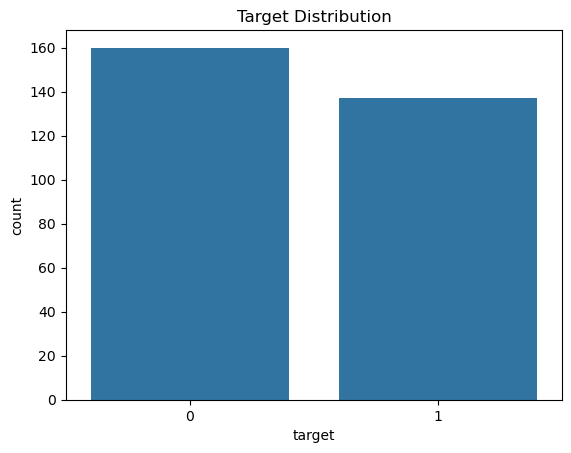

In [130]:
# Visualize the target distribution
sns.countplot(x='target', data=data)
plt.title('Target Distribution')
plt.show()

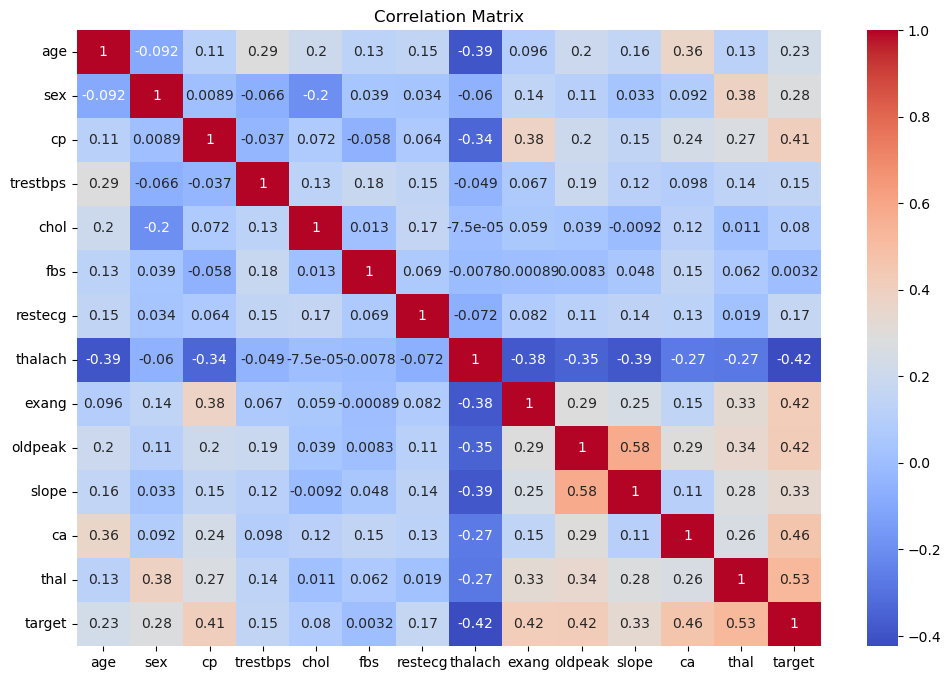

In [132]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### DATA PROCESSING:-

In [134]:
# Split the dataset into features and target variable
X = data.drop('target', axis=1)
y = data['target']

In [136]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [138]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### MODEL TRAINING:-

In [140]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [142]:
# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [144]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90        49
           1       0.90      0.85      0.88        41

    accuracy                           0.89        90
   macro avg       0.89      0.89      0.89        90
weighted avg       0.89      0.89      0.89        90



### CONFUSION MATRIX & ROC CURVE:-

In [146]:
# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

In [148]:
# Generate ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


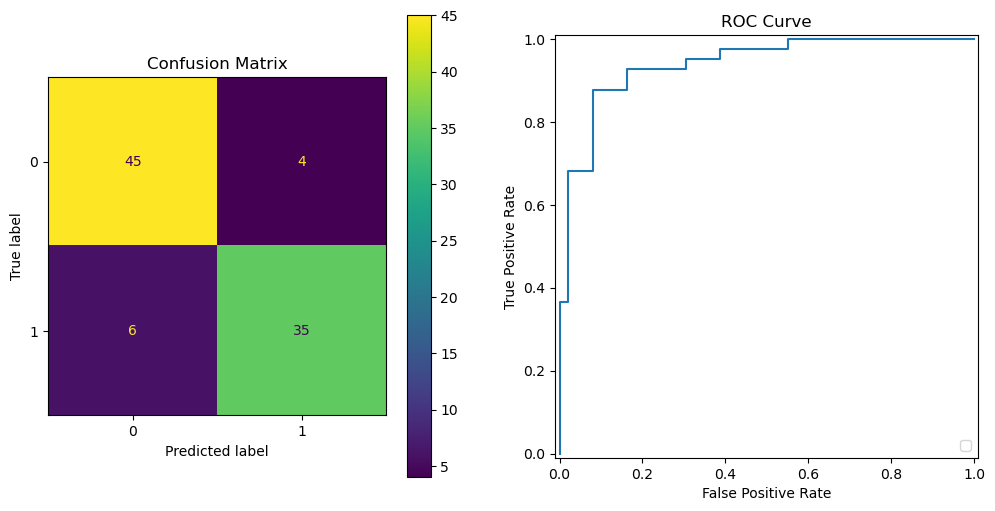

In [156]:
# Plot both in one figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# Confusion Matrix
cm_display.plot(ax=ax1)
ax1.set_title('Confusion Matrix')
# ROC Curve
roc_display.plot(ax=ax2)
ax2.set_title('ROC Curve')

plt.show()